# WEEKLY STOCK MARKET DATA
This question uses the Weekly dataset in the ISLP. It contains 1089 weekly stock returns for the 21 years between the beginning of 1990 to the end of 2010. 

In [1]:
import numpy as np
import pandas as pd
from ISLP import load_data
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [2]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
Sweekly = load_data('Weekly')
Sweekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


### (a) Produce some numerical and graphical summaries of the Weekly data. Are there any apparent patterns?

In [4]:
Sweekly.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [5]:
Sweekly.corr(numeric_only=True)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


Year and Volume: The high correlation (0.841942) suggests that trading volume has increased significantly over the years. This could be due to a variety of factors, such as market growth, the introduction of new financial instruments, or increased market participation.

Lag Variables and Today: The lag variables (Lag1 to Lag5) do not show strong correlations with Today. This indicates that past weekly returns are not strong predictors of the current week's return, at least not in a simple linear sense.

Lag Variables Inter-correlations: The lag variables show very low to moderate negative correlations with each other. This is expected since they represent sequential past returns, and financial returns are often assumed to be weakly serially correlated.

Today and Volume: The correlation between Today and Volume is also very low, suggesting that the day's return does not have a strong linear relationship with the trading volume.

<Axes: >

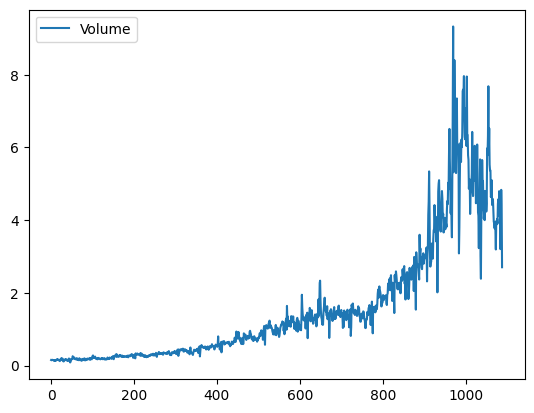

In [6]:
Sweekly.plot(y='Volume')

The plot of Volume corroborates the correlation finding, showing a clear pattern of increasing volume over time, which may reflect the overall growth of the market or the dataset's coverage of a more active market period.

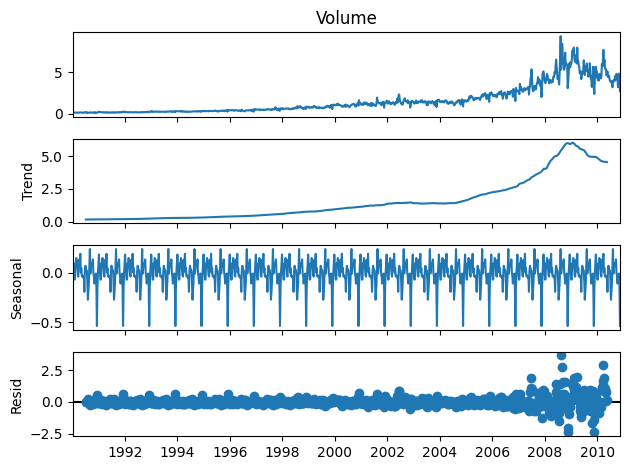

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a weekly date range starting from the first week of 1990
weekly_dates = pd.date_range(start='1990-01-01', periods=len(Sweekly), freq='W')

# Assign this date range as the index of our dataframe
Sweekly.index = weekly_dates

# Decompose the Volume time series using an additive model
decomposition = seasonal_decompose(Sweekly['Volume'], model='additive')

# Plot the decomposed components
decomposition_plot = decomposition.plot()


### (b) Use the full data to perform a logistic regression with Direction as the response variable and the five lags variables plus Volume as predictors. Do any of the predictors appear to be statistical significant? If so which ones?

In [8]:
allvars = Sweekly.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Sweekly)
y = Sweekly.Direction == 'Up'
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


In [9]:
results.params

intercept    0.266864
Lag1        -0.041269
Lag2         0.058442
Lag3        -0.016061
Lag4        -0.027790
Lag5        -0.014472
Volume      -0.022742
dtype: float64

In [10]:
results.pvalues

intercept    0.001899
Lag1         0.118144
Lag2         0.029601
Lag3         0.546924
Lag4         0.293653
Lag5         0.583348
Volume       0.537675
dtype: float64

Among all the predictors included in the model, **only Lag2 appears to be statistically significant**, indicating it has a significant effect on the direction of this week's return. The other lag variables (Lag1, Lag3, Lag4, and Lag5) and Volume do not appear to significantly influence the market's direction based on this analysis.

### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes logistic regression is making.

In [11]:
probs = results.predict()
probs[:10]

array([0.60862494, 0.60103144, 0.58756995, 0.48164156, 0.61690129,
       0.56841902, 0.57860971, 0.51519724, 0.57151998, 0.55542873])

In [12]:
labels = np.array(['Down']*1089)
labels[probs>0.5] = "Up"

In [13]:
confusion_table(labels, Sweekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [14]:
(54+557)/1089, np.mean(labels == Sweekly.Direction)

(0.5610651974288338, 0.5610651974288338)

The matrix compares the actual values (Truth) with the values predicted by the model (Predicted). Here's how to interpret the confusion matrix provided:

- True Negatives (TN): The model correctly predicted the market would go down 54 times.
- False Negatives (FN): The model incorrectly predicted the market would go down when it actually went up 48 times.
- False Positives (FP): The model incorrectly predicted the market would go up when it actually went down 430 times.
- True Positives (TP): The model correctly predicted the market would go up 557 times.


The main components of the confusion matrix are:

- Accuracy: The fraction of predictions the model got right. In this case, (54 + 557) / 1089 = 0.561 or 56.1%. This means the model correctly predicts the market direction 56.1% of the time.
- Precision: The fraction of relevant instances among the retrieved instances. For predicting "Up", it would be 557 / (557 + 430) = 0.5643.
- Recall (Sensitivity): The fraction of relevant instances that have been retrieved over the total amount of relevant instances. For predicting "Up", it would be 557 / (557 + 48) = 0.9206.


### (d) Now fit the logistic regression using a training data period from 1990 to 2008 and Lag2 as the only predictor. Compute the confusion matrix and overall fraction of correct predictions for the hold out data, i.e., 2009 and 2010.

In [15]:
train = (Sweekly.Year < 2009)
Sweekly_train = Sweekly.loc[train]
Sweekly_test = Sweekly.loc[~train]
Sweekly_test.shape

(104, 9)

In [16]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)


In [17]:
D = Sweekly.Direction
L_train, L_test = D.loc[train], D.loc[~train]


In [18]:
labels = np.array(['Down']*104)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)


Truth,Down,Up
Predicted,,
Down,31,44
Up,12,17


In [19]:
np.mean(labels == L_test), np.mean(labels != L_test)

(0.46153846153846156, 0.5384615384615384)

In [20]:
model = MS(['Lag2']).fit(Sweekly)
X = model.transform(Sweekly)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(['Down']*104)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [21]:
(9+56)/104,56/(56+34)

(0.625, 0.6222222222222222)

62.5% of the daily movements have been correctly predicted.

In [22]:
newdata = pd.DataFrame({'Lag2':[1.1, -0.8]});
newX = model.transform(newdata)
results.predict(newX)

0    0.566396
1    0.539115
dtype: float64

### (e) Repeat (d) using the linear discriminant analysis (LDA) and quadratic discriminant analysis (QDA).

#### LDA

In [23]:
lda = LDA(store_covariance=True)

In [24]:
X_train, X_test = [M.drop(columns=['intercept'])
                   for M in [X_train, X_test]]
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [25]:
lda.means_

array([[-0.03568254],
       [ 0.26036581]])

In [26]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [27]:
lda.priors_

array([0.44771574, 0.55228426])

In [28]:
lda.scalings_

array([[0.44141622]])

In [29]:
lda_pred = lda.predict(X_test)

In [30]:
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [31]:
(9+56)/104

0.625

In [32]:
lda_prob = lda.predict_proba(X_test)
np.all(
       np.where(lda_prob[:,1] >= 0.5, 'Up','Down') == lda_pred
       )


True

In [33]:
np.all(
       [lda.classes_[i] for i in np.argmax(lda_prob, 1)] == lda_pred
       )


True

In [34]:
np.sum(lda_prob[:,0] > 0.9)

0

#### QDA

In [35]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)


QuadraticDiscriminantAnalysis(store_covariance=True)

In [36]:
qda.means_, qda.priors_

(array([[-0.03568254],
        [ 0.26036581]]),
 array([0.44771574, 0.55228426]))

In [37]:
qda.covariance_[0]

array([[4.83781758]])

In [38]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [39]:
(0+61)/104

0.5865384615384616

In [40]:
np.mean(qda_pred == L_test)

0.5865384615384616

### (f) For the test data using KNN, plot the misclassification error rate vs 1/k. What is the optimal k that minimizes the test misclassification error rate?

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
knn1 = KNeighborsClassifier(n_neighbors=1)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,Down,Up
Predicted,,
Down,21,30
Up,22,31


In [43]:
(21+31)/104, np.mean(knn1_pred == L_test)

(0.5, 0.5)

In [44]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train, L_train).predict(X_test)
np.mean(knn3_pred == L_test)

0.5673076923076923

In [45]:
for K in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    
    templ = ('K={0:d}: # predicted to rent: {1:>2},' +
            '  # who did rent {2:d}, accuracy {3:.1%}')
    pred = C.loc[True].sum()
    did_rent = C.loc[True,True]
    print(templ.format(
          K,
          pred,
          did_rent,
          did_rent / pred))

K=1: # predicted to rent: 53,  # who did rent 31, accuracy 58.5%
K=2: # predicted to rent: 29,  # who did rent 16, accuracy 55.2%
K=3: # predicted to rent: 70,  # who did rent 43, accuracy 61.4%
K=4: # predicted to rent: 51,  # who did rent 34, accuracy 66.7%
K=5: # predicted to rent: 68,  # who did rent 40, accuracy 58.8%


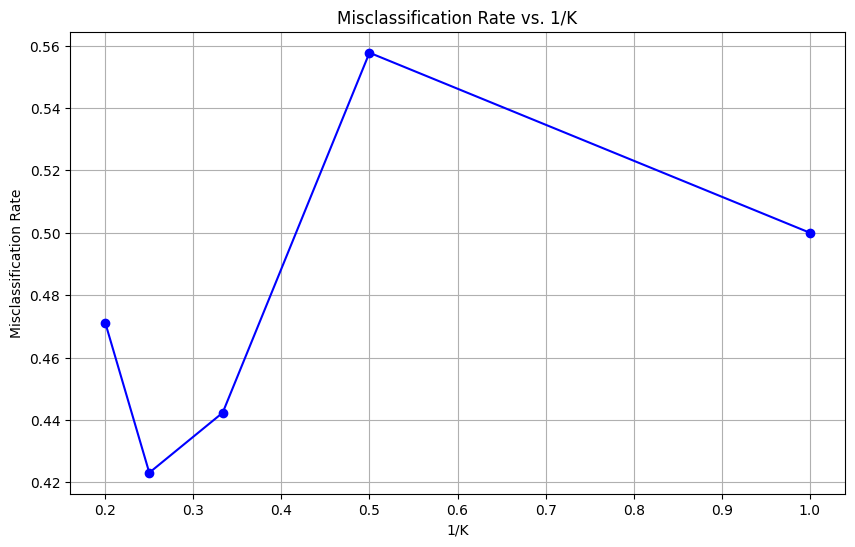

Optimal k that minimizes the test misclassification error rate: 4
Accuracy for optimal k=4: 0.5769230769230769


In [65]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

misclassification_rates = []
inverse_ks = []

# Define ks range for later use
ks = range(1, 6)

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    predictions = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    
    misclassification_rate = 1 - accuracy
    misclassification_rates.append(misclassification_rate)
    
    inverse_ks.append(1/k)


plt.figure(figsize=(10, 6))
plt.plot(inverse_ks, misclassification_rates, marker='o', linestyle='-', color='blue')
plt.title('Misclassification Rate vs. 1/K')
plt.xlabel('1/K')
plt.ylabel('Misclassification Rate')
plt.grid(True)
plt.show()


optimal_k = ks[misclassification_rates.index(min(misclassification_rates))]
print("Optimal k that minimizes the test misclassification error rate:", optimal_k)
optimal_accuracy = 1 - misclassification_rates[ks.index(optimal_k)]
print(f"Accuracy for optimal k={optimal_k}: {optimal_accuracy}")


#### (g) Which of these various methods appears to provide the best results on this data?

The accuracy of logistic regression prediction is 0.625  
the accuracy of LDA prediction is 0.625  
the accuracy of QDA prediction is 0.5865  
Knn performs the best when k=4, and the prediction accuracy is 0.5769

**In summary, LDA and logistic regression yield the best prediction results.**

#### (h) Plot the ROC curves for different classifiers, e.g. logistic regression, LDA, KNN with different k values and discuss the performance (the larger the area under the curve, the better the classifier).

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [48]:
model = MS(['Lag2']).fit(Sweekly)
X = model.transform(Sweekly)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(['Down']*104)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [49]:
fpr, tpr, thresholds = roc_curve(y_true=L_test, y_score=probs, pos_label='Up')

In [50]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--', label='Random')
    plt.grid()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [51]:
roc_auc_score(L_test, probs)

0.5463210064811285

In [52]:
fpr_lda, tps_lda, threshs_lda = roc_curve(y_true = L_test, y_score = lda_prob[:, 1], pos_label='Up')

In [53]:
X_tt = X_test.drop(columns=['intercept'])
qda_prob = qda.predict_proba(X_tt)

In [54]:
fpr_qda, tps_qda, threshs_qda = roc_curve(y_true = L_test, y_score = qda_prob[:, 1], pos_label='Up')

In [59]:
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4_pred = knn4.fit(X_train, L_train).predict(X_test)

In [60]:
knn4_prob = knn4.predict_proba(X_test)[:, 1]

In [61]:
fpr_knn4, tps_knn4, threshs_knn4 = roc_curve(y_true = L_test, y_score = knn4_prob, pos_label='Up')

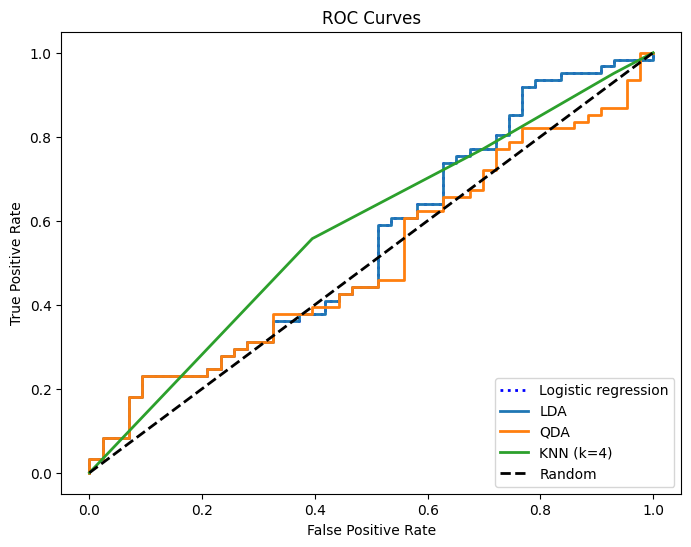

In [66]:
plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, 'b:', linewidth=2, label='Logistic regression')
plt.plot(fpr_lda, tps_lda, linewidth=2, label="LDA")
plt.plot(fpr_qda, tps_qda, linewidth=2, label="QDA")
plt.plot(fpr_knn4, tps_knn4, linewidth=2, label="KNN (k=4)")
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random')


plt.legend(loc="lower right")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

plt.show()
